In [2]:
import numpy as np
import math
import random
from statistics import stdev
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
seconds = 4000 #data aquisition time
samples = 20 #samples per second

In [14]:
time = np.linspace(0,seconds,seconds*samples)
heart_beat_amp = 500 #amplitude of the heart beat in counts
breath_amp = 50 #amplitude of breaths in counts
beats_per_sec = 1
breaths_per_sec =.2
noise_coefficient = 248 #This is less sensitive i.e. Need higher numbers to introduce more noise. 


In [5]:
def vital_array(my_array,Hz,amplitude,): #This function simply makes a sinusoidal data set given vitals (biological vitals)
    new_array = amplitude*2*np.sin(my_array*2*Hz*np.pi) + 2.5*amplitude
    return new_array

In [6]:
#creation of the different signals 
heartbeat = vital_array(time,beats_per_sec,heart_beat_amp)
breathing = vital_array(time,breaths_per_sec,breath_amp)
noise_random = np.random.uniform(-1,1,len(time)) * noise_coefficient

In [7]:
glucose_concentration = ((-1*(time-2000)**2)*.000018)+145 #creates a data set for glucose rising and falling during 4000 seconds
#this is an inacurate way of calculating the counts due to glucose and will need to be replaced with accurate wavelenth aprox.
glucose_counts = glucose_concentration*(0.0001/0.009)

In [8]:
total_signal_1 = heartbeat + breathing + noise_random + glucose_counts

[0, 10, 0, 3000]

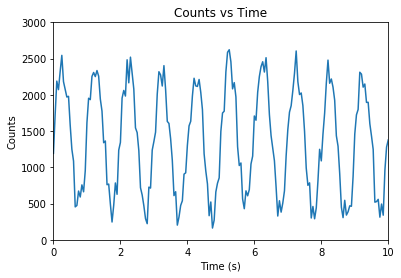

In [9]:
#used to plot the data. For visual use.  
plt.plot(time, total_signal_1)
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.title('Counts vs Time')
plt.axis([0,10,0,3000])
#plt.show()

In [13]:
#Creates a data frame to export data
data = pd.DataFrame({'Time (s)': time, 'Wavelength 1': total_signal_1, 'Glucose mg/dL': glucose_concentration},
    columns=['Time (s)', 'Wavelength 1', 'Glucose mg/dL'])
data.to_csv("Data.csv")
data.to_excel("Data.xlsx")